In [207]:
import numpy as np
import pandas as pd
from wetb.hawc2 import Hawc2io

In [263]:
# EXAMPLE HAWC2 FILE TO GET TO THE RIGHT CHANNEL NAMES
fname = 'z:\StudyData\VS_Benchmark\TimeSeries\IEA_15MW_RWT_VS_BenchmarkStudy_PointNo1.sel'
res = Hawc2io.ReadHawc2(fname)
sig = res.ReadAll()
SingleFileData = pd.DataFrame(data = sig, columns = res.ChInfo[2])

TargetTimeSeries = pd.read_csv('z:\StudyData\VS_Benchmark\TimeSeries\VS_benchmark_timeseries_PointNo1.csv', sep = ';')
#TargetTimeSeries.set_index('Time', inplace = True)
TargetChannelNames = TargetTimeSeries.columns.values

In [264]:
DropChannels =  {'Aero rotor torque','Aero rotor power','Aero rotor thrust',
                     'Rotor speed','pitch1 angle speed','pitch2 angle speed','pitch3 angle speed',
                     'MomentMx Mbdy:monopile nodenr:   5 coo: monopile  10m above mudline',
                     'MomentMy Mbdy:monopile nodenr:   5 coo: monopile  10m above mudline',
                     'MomentMz Mbdy:monopile nodenr:   5 coo: monopile  10m above mudline',
                     'Force  Fx Mbdy:monopile nodenr:   5 coo: monopile  10m above mudline',
                     'Force  Fy Mbdy:monopile nodenr:   5 coo: monopile  10m above mudline',
                     'Force  Fz Mbdy:monopile nodenr:   5 coo: monopile  10m above mudline',
                       'MomentMx Mbdy:shaft nodenr:   1 coo: shaft  main bearing',
                       'MomentMy Mbdy:shaft nodenr:   1 coo: shaft  main bearing',                     
                       'Force  Fx Mbdy:shaft nodenr:   1 coo: shaft  main bearing',
                       'Force  Fy Mbdy:shaft nodenr:   1 coo: shaft  main bearing',
                       'Force  Fz Mbdy:shaft nodenr:   1 coo: shaft  main bearing',
                       'State pos x  Mbdy:blade1 E-nr:   9 Z-rel:1.00 coo: global  gl blade 1 tip pos',
                       'State pos y  Mbdy:blade1 E-nr:   9 Z-rel:1.00 coo: global  gl blade 1 tip pos',
                       'State pos z  Mbdy:blade1 E-nr:   9 Z-rel:1.00 coo: global  gl blade 1 tip pos',                     
                     'Wind speed Vx of blade   1 at radius  71.63, global coo.',
                       'Angle of attack of blade   1 at radius  71.63',
                       'Angle of attack of blade   2 at radius  71.63',
                       'Angle of attack of blade   3 at radius  71.63',
                       'Cl of blade   1 at radius  71.63',
                       'Cl of blade   2 at radius  71.63',
                       'Cl of blade   3 at radius  71.63',
                       'Cd of blade   1 at radius  71.63',
                       'Cd of blade   2 at radius  71.63',
                       'Cd of blade   3 at radius  71.63', 
                       'dtu_we_controller inpvec   1  generator torque reference [nm]',
                       'dtu_we_controller inpvec   2  pitch angle reference of blade 1 [rad]',
                       'dtu_we_controller inpvec   3  pitch angle reference of blade 2 [rad]',
                       'dtu_we_controller inpvec   4  pitch angle reference of blade 3 [rad]',
                       'dtu_we_controller inpvec   5  power reference [w]',
                       'dtu_we_controller inpvec   6  filtered wind speed [m/s]',
                       'dtu_we_controller inpvec   7  filtered rotor speed [rad/s]',
                       'dtu_we_controller inpvec   8  filtered rotor speed error for torque [rad/s]',
                       'dtu_we_controller inpvec   9  bandpass filtered rotor speed [rad/s]',
                       'dtu_we_controller inpvec  10  proportional term of torque contr. [nm]',
                       'dtu_we_controller inpvec  11  integral term of torque controller [nm]',
                       'dtu_we_controller inpvec  12  minimum limit of torque [nm]',
                       'dtu_we_controller inpvec  13  maximum limit of torque [nm]',
                       'dtu_we_controller inpvec  14  torque limit switch based on pitch [-]',
                       'dtu_we_controller inpvec  15  filtered rotor speed error for pitch [rad/s]',
                       'dtu_we_controller inpvec  16  power error for pitch [w]',
                       'dtu_we_controller inpvec  17  proportional term of pitch controller [rad]',
                       'dtu_we_controller inpvec  18  integral term of pitch controller [rad]',
                       'dtu_we_controller inpvec  19  minimum limit of pitch [rad]',
                       'dtu_we_controller inpvec  20  maximum limit of pitch [rad]',
                       'dtu_we_controller inpvec  21  torque reference from dt dammper [nm]',
                       'dtu_we_controller inpvec  22  status signal [-]',
                       'dtu_we_controller inpvec  23  total added pitch rate [rad/s]',
                       'dtu_we_controller inpvec  24  filtered mean pitch for gain sch [rad]',
                       'dtu_we_controller inpvec  25  flag for mechnical brake [0=off/1=on]',
                       'dtu_we_controller inpvec  26  flag for emergency pitch stop [0=off/1=on]',
                       'dtu_we_controller inpvec  27  lp filtered acceleration level [m/s^2]',
                       'dtu_we_controller inpvec  31  monitored average of reference pitch [rad]',
                       'dtu_we_controller inpvec  32  monitored ave. of actual pitch (blade 1) [rad]',
                       'generator_servo inpvec   8  grid flag [0=run/1=stop]',
                       'mech_brake inpvec   3  brake torque [nm]',
                       'servo_with_limits inpvec   1  pitch 1 [rad]',
                       'servo_with_limits inpvec   2  pitch 2 [rad]',
                       'servo_with_limits inpvec   3  pitch 3 [rad]',
                       'towerclearance_mblade inpvec   1  bltip tow min d [m]'}

In [265]:
SingleFileData.drop(columns = DropChannels, inplace = True)

In [266]:
Hawcrotspeedchannels = list(SingleFileData.filter(regex = 'shaft_rot angle speed'))
for OneChannel in Hawcrotspeedchannels:
        OneChannelOut = OneChannel.replace('angle','')
        SingleFileData.rename(columns = {OneChannel:OneChannelOut}, inplace = True)

In [267]:
HawcChannelNames = SingleFileData.columns.values

In [268]:
HawcChannelNames

array(['Time', 'shaft_rot angle', 'shaft_rot  speed', 'pitch1 angle',
       'pitch2 angle', 'pitch3 angle',
       'generator_servo inpvec   1  mgen lss [nm]',
       'generator_servo inpvec   2  pelec [w]',
       'generator_servo inpvec   3  mframe [nm]',
       'generator_servo inpvec   4  mgen hss [nm]',
       'MomentMx Mbdy:monopile nodenr:   4 coo: monopile  mudline',
       'MomentMy Mbdy:monopile nodenr:   4 coo: monopile  mudline',
       'MomentMz Mbdy:monopile nodenr:   4 coo: monopile  mudline',
       'MomentMx Mbdy:monopile nodenr:   7 coo: monopile  waterline',
       'MomentMy Mbdy:monopile nodenr:   7 coo: monopile  waterline',
       'MomentMz Mbdy:monopile nodenr:   7 coo: monopile  waterline',
       'MomentMx Mbdy:tower nodenr:   1 coo: tower  tower base',
       'MomentMy Mbdy:tower nodenr:   1 coo: tower  tower base',
       'MomentMz Mbdy:tower nodenr:   1 coo: tower  tower base',
       'MomentMx Mbdy:tower nodenr:   5 coo: tower  tower mid',
       'MomentMy

In [269]:
TargetChannelNames

array(['Time', 'Rotor azimuth [deg]', 'Rotor rotational speed [rpm]',
       'Blade 1 pitch angle [deg]', 'Blade 2 pitch angle [deg]',
       'Blade 3 pitch angle [deg]', 'Generator LSS torque [Nm]',
       'Electrical power [W]', 'Bedframe moment [Nm]',
       'Generator HSS torque [Nm]', 'Mudline moment Mx[kNm]',
       'Mudline moment My[kNm]', 'Mudline moment Mz[kNm]',
       'Waterline moment Mx[kNm]', 'Waterline moment My[kNm]',
       'Waterline moment Mz[kNm]', 'Tower base moment Mx[kNm]',
       'Tower base moment My[kNm]', 'Tower base moment Mz[kNm]',
       'Tower mid moment Mx[kNm]', 'Tower mid moment My[kNm]',
       'Tower mid moment Mz[kNm]', 'Tower top moment Mx[kNm]',
       'Tower top moment My[kNm]', 'Tower top moment Mz[kNm]',
       'Low-speed shaft torque [kNm]', 'Blade1 root moment Mx[kNm]',
       'Blade1 root moment My[kNm]', 'Blade1 root moment Mz[kNm]',
       'Blade2 root moment Mx[kNm]', 'Blade2 root moment My[kNm]',
       'Blade2 root moment Mz[kNm]', 'Bl

In [270]:
Data = pd.read_csv('z:\StudyData\VS_Benchmark\Results\ChannelStatistics_VSBenchmarkStudy_p1-1000.txt', delimiter = ';')

In [271]:
Data

,Filename,Ch 1 Time Mean,Ch 1 Time Std,Ch 1 Time Min,Ch 1 Time Max,Ch 1 Time SeqM4,Ch 1 Time SeqM8,Ch 1 Time SeqM12,Ch 2 shaft_rot angle Mean,Ch 2 shaft_rot angle Std,...,Ch 209 servo_with_limits inpvec 3 pitch 3 [rad] SeqM8,Ch 209 servo_with_limits inpvec 3 pitch 3 [rad] SeqM12,Ch 210 Mean,Ch 210 Std,Ch 210 Min,Ch 210 Max,Ch 210 SeqM4,Ch 210 SeqM8,Ch 210 SeqM12,Unnamed: 1471
0,iea_15mw_rwt_vs_benchmarkstudy_pointno1,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.821615,104.044771,...,0.0,0.0,22.975717,6.330976,14.185870,34.16224,0.0,0.0,0.0,NaN
1,iea_15mw_rwt_vs_benchmarkstudy_pointno2,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.874156,104.149914,...,0.0,0.0,23.063454,6.317508,14.324654,34.16224,0.0,0.0,0.0,NaN
2,iea_15mw_rwt_vs_benchmarkstudy_pointno3,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.372388,104.157772,...,0.0,0.0,23.063023,6.296359,14.276614,34.16224,0.0,0.0,0.0,NaN
3,iea_15mw_rwt_vs_benchmarkstudy_pointno4,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.474333,103.877627,...,0.0,0.0,23.103087,6.306034,14.418600,34.16224,0.0,0.0,0.0,NaN
4,iea_15mw_rwt_vs_benchmarkstudy_pointno5,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.425469,104.164863,...,0.0,0.0,22.973169,6.335606,14.084451,34.16224,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,iea_15mw_rwt_vs_benchmarkstudy_pointno996,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.481348,103.886239,...,0.0,0.0,23.074788,6.314533,14.312911,34.16224,0.0,0.0,0.0,NaN
996,iea_15mw_rwt_vs_benchmarkstudy_pointno997,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.387840,104.144405,...,0.0,0.0,23.033140,6.311203,14.034275,34.16224,0.0,0.0,0.0,NaN
997,iea_15mw_rwt_vs_benchmarkstudy_pointno998,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.901280,104.149917,...,0.0,0.0,23.039445,6.308095,14.273411,34.16224,0.0,0.0,0.0,NaN
998,iea_15mw_rwt_vs_benchmarkstudy_pointno999,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,181.781081,105.948313,...,0.0,0.0,23.269700,6.336453,14.114343,34.16224,0.0,0.0,0.0,NaN


In [272]:
for iChannel in DropChannels:
    Data.drop(list(Data.filter(regex = iChannel)), axis = 1, inplace = True)

In [273]:
rotspeedchannels = list(Data.filter(regex = 'shaft_rot angle speed'))
for OneChannel in rotspeedchannels:
        OneChannelOut = OneChannel.replace('angle','')
        Data.rename(columns = {OneChannel:OneChannelOut}, inplace = True)

In [274]:
Data

,Filename,Ch 1 Time Mean,Ch 1 Time Std,Ch 1 Time Min,Ch 1 Time Max,Ch 1 Time SeqM4,Ch 1 Time SeqM8,Ch 1 Time SeqM12,Ch 2 shaft_rot angle Mean,Ch 2 shaft_rot angle Std,...,Ch 209 servo_with_limits inpvec 3 pitch 3 [rad] SeqM8,Ch 209 servo_with_limits inpvec 3 pitch 3 [rad] SeqM12,Ch 210 Mean,Ch 210 Std,Ch 210 Min,Ch 210 Max,Ch 210 SeqM4,Ch 210 SeqM8,Ch 210 SeqM12,Unnamed: 1471
0,iea_15mw_rwt_vs_benchmarkstudy_pointno1,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.821615,104.044771,...,0.0,0.0,22.975717,6.330976,14.185870,34.16224,0.0,0.0,0.0,NaN
1,iea_15mw_rwt_vs_benchmarkstudy_pointno2,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.874156,104.149914,...,0.0,0.0,23.063454,6.317508,14.324654,34.16224,0.0,0.0,0.0,NaN
2,iea_15mw_rwt_vs_benchmarkstudy_pointno3,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.372388,104.157772,...,0.0,0.0,23.063023,6.296359,14.276614,34.16224,0.0,0.0,0.0,NaN
3,iea_15mw_rwt_vs_benchmarkstudy_pointno4,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.474333,103.877627,...,0.0,0.0,23.103087,6.306034,14.418600,34.16224,0.0,0.0,0.0,NaN
4,iea_15mw_rwt_vs_benchmarkstudy_pointno5,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.425469,104.164863,...,0.0,0.0,22.973169,6.335606,14.084451,34.16224,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,iea_15mw_rwt_vs_benchmarkstudy_pointno996,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.481348,103.886239,...,0.0,0.0,23.074788,6.314533,14.312911,34.16224,0.0,0.0,0.0,NaN
996,iea_15mw_rwt_vs_benchmarkstudy_pointno997,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.387840,104.144405,...,0.0,0.0,23.033140,6.311203,14.034275,34.16224,0.0,0.0,0.0,NaN
997,iea_15mw_rwt_vs_benchmarkstudy_pointno998,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,178.901280,104.149917,...,0.0,0.0,23.039445,6.308095,14.273411,34.16224,0.0,0.0,0.0,NaN
998,iea_15mw_rwt_vs_benchmarkstudy_pointno999,350.005,202.074038,0.0,700.0,0.0,0.0,0.0,181.781081,105.948313,...,0.0,0.0,23.269700,6.336453,14.114343,34.16224,0.0,0.0,0.0,NaN


In [275]:
for i in range(len(HawcChannelNames)):
    iChannels = HawcChannelNames[i]
    Xchannels = list(Data.filter(like = iChannels))
    for OneChannel in Xchannels:
        #OneChannelOut = OneChannel.replace(iChannels,TargetChannelNames[i])
        OneChannelOut = 'Ch ' + str(i+1) + ' ' + TargetChannelNames[i] + ' ' + OneChannel.split(' ')[-2]
        # Replace channel number with consecutive
        # ChannelNo = OneChannelOut.split(' ')[1]
        # OneChannelOut = OneChannelOut.replace(ChannelNo,str(i+1))
        print(OneChannelOut)
        Data.rename(columns = {OneChannel:OneChannelOut}, inplace = True)

Ch 1 Time Mean
Ch 1 Time Std
Ch 1 Time Min
Ch 1 Time Max
Ch 1 Time SeqM4
Ch 1 Time SeqM8
Ch 1 Time SeqM12
Ch 2 Rotor azimuth [deg] Mean
Ch 2 Rotor azimuth [deg] Std
Ch 2 Rotor azimuth [deg] Min
Ch 2 Rotor azimuth [deg] Max
Ch 2 Rotor azimuth [deg] SeqM4
Ch 2 Rotor azimuth [deg] SeqM8
Ch 2 Rotor azimuth [deg] SeqM12
Ch 3 Rotor rotational speed [rpm] Mean
Ch 3 Rotor rotational speed [rpm] Std
Ch 3 Rotor rotational speed [rpm] Min
Ch 3 Rotor rotational speed [rpm] Max
Ch 3 Rotor rotational speed [rpm] SeqM4
Ch 3 Rotor rotational speed [rpm] SeqM8
Ch 3 Rotor rotational speed [rpm] SeqM12
Ch 4 Blade 1 pitch angle [deg] Mean
Ch 4 Blade 1 pitch angle [deg] Std
Ch 4 Blade 1 pitch angle [deg] Min
Ch 4 Blade 1 pitch angle [deg] Max
Ch 4 Blade 1 pitch angle [deg] SeqM4
Ch 4 Blade 1 pitch angle [deg] SeqM8
Ch 4 Blade 1 pitch angle [deg] SeqM12
Ch 5 Blade 2 pitch angle [deg] Mean
Ch 5 Blade 2 pitch angle [deg] Std
Ch 5 Blade 2 pitch angle [deg] Min
Ch 5 Blade 2 pitch angle [deg] Max
Ch 5 Blade 2 pi

Ch 42 Blade3 1/3 span moment Mx[kNm] Mean
Ch 42 Blade3 1/3 span moment Mx[kNm] Std
Ch 42 Blade3 1/3 span moment Mx[kNm] Min
Ch 42 Blade3 1/3 span moment Mx[kNm] Max
Ch 42 Blade3 1/3 span moment Mx[kNm] SeqM4
Ch 42 Blade3 1/3 span moment Mx[kNm] SeqM8
Ch 42 Blade3 1/3 span moment Mx[kNm] SeqM12
Ch 43 Blade3 1/3 span moment My[kNm] Mean
Ch 43 Blade3 1/3 span moment My[kNm] Std
Ch 43 Blade3 1/3 span moment My[kNm] Min
Ch 43 Blade3 1/3 span moment My[kNm] Max
Ch 43 Blade3 1/3 span moment My[kNm] SeqM4
Ch 43 Blade3 1/3 span moment My[kNm] SeqM8
Ch 43 Blade3 1/3 span moment My[kNm] SeqM12
Ch 44 Blade3 1/3 span moment Mz[kNm] Mean
Ch 44 Blade3 1/3 span moment Mz[kNm] Std
Ch 44 Blade3 1/3 span moment Mz[kNm] Min
Ch 44 Blade3 1/3 span moment Mz[kNm] Max
Ch 44 Blade3 1/3 span moment Mz[kNm] SeqM4
Ch 44 Blade3 1/3 span moment Mz[kNm] SeqM8
Ch 44 Blade3 1/3 span moment Mz[kNm] SeqM12
Ch 45 Blade1 2/3 span moment Mx[kNm] Mean
Ch 45 Blade1 2/3 span moment Mx[kNm] Std
Ch 45 Blade1 2/3 span moment Mx[

Ch 97 Tower top side-side displacement dy [m] Max
Ch 97 Tower top side-side displacement dy [m] SeqM4
Ch 97 Tower top side-side displacement dy [m] SeqM8
Ch 97 Tower top side-side displacement dy [m] SeqM12
Ch 98 Tower top fore-aft acceleration ax [m/s2] Mean
Ch 98 Tower top fore-aft acceleration ax [m/s2] Std
Ch 98 Tower top fore-aft acceleration ax [m/s2] Min
Ch 98 Tower top fore-aft acceleration ax [m/s2] Max
Ch 98 Tower top fore-aft acceleration ax [m/s2] SeqM4
Ch 98 Tower top fore-aft acceleration ax [m/s2] SeqM8
Ch 98 Tower top fore-aft acceleration ax [m/s2] SeqM12
Ch 99 Tower top side-side acceleration ay [m/s2] Mean
Ch 99 Tower top side-side acceleration ay [m/s2] Std
Ch 99 Tower top side-side acceleration ay [m/s2] Min
Ch 99 Tower top side-side acceleration ay [m/s2] Max
Ch 99 Tower top side-side acceleration ay [m/s2] SeqM4
Ch 99 Tower top side-side acceleration ay [m/s2] SeqM8
Ch 99 Tower top side-side acceleration ay [m/s2] SeqM12
Ch 100 Tower mid fore-aft displacement dx 

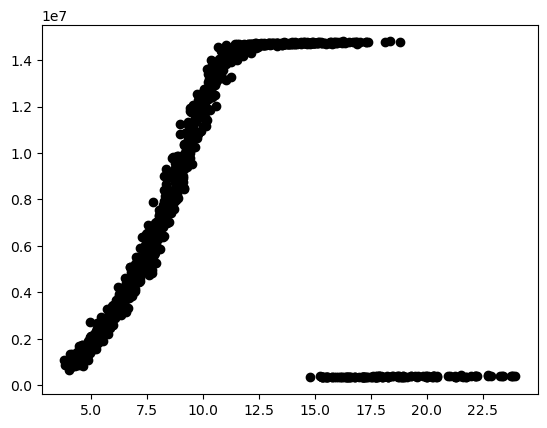

In [277]:
import matplotlib.pyplot as plt

plt.plot(Data['Ch 118 Free wind speed Vy pos    0.00,   0.00,-150.00 Mean'],Data['Ch 8 Electrical power [W] Mean'],'ok')

In [279]:
Data.to_csv('z:\StudyData\VS_Benchmark\Results\ChannelStatistics_VSBenchmarkStudy_p1-1000.csv', sep = ';')